In [3]:
#Importing pandas.Using it for data analysis and data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
#Reading the dataset
df = pd.read_csv(r"C:\Users\Sunjeevi\PycharmProjects\CCVDPUML\venv\CardiovascularDiseasePrediction\Dataset\Dataset.csv")

In [5]:
#Checking head and examining
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
#Checking tail and examining
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
#Mean,count, and standard deviation is checked
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#Data types and non-null count is displayed for all features. We have balanced data set here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#Number of rows and columns
df.shape

(303, 14)

In [10]:
#Column names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
#Checking if any feature has null values. We have balanced dataset here
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

### Data Visualization

<Axes: xlabel='target', ylabel='count'>

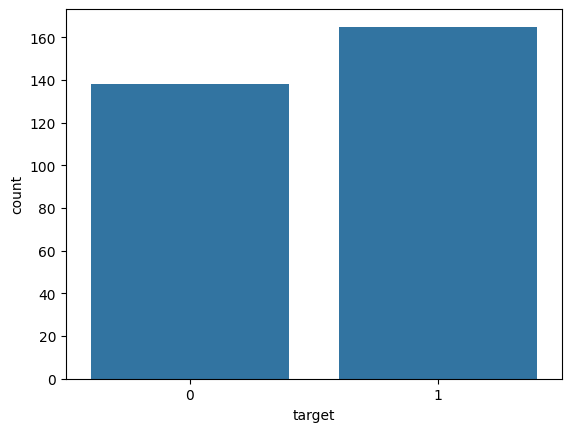

In [12]:
#Count Plot
sns.countplot(x="target", data=df)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

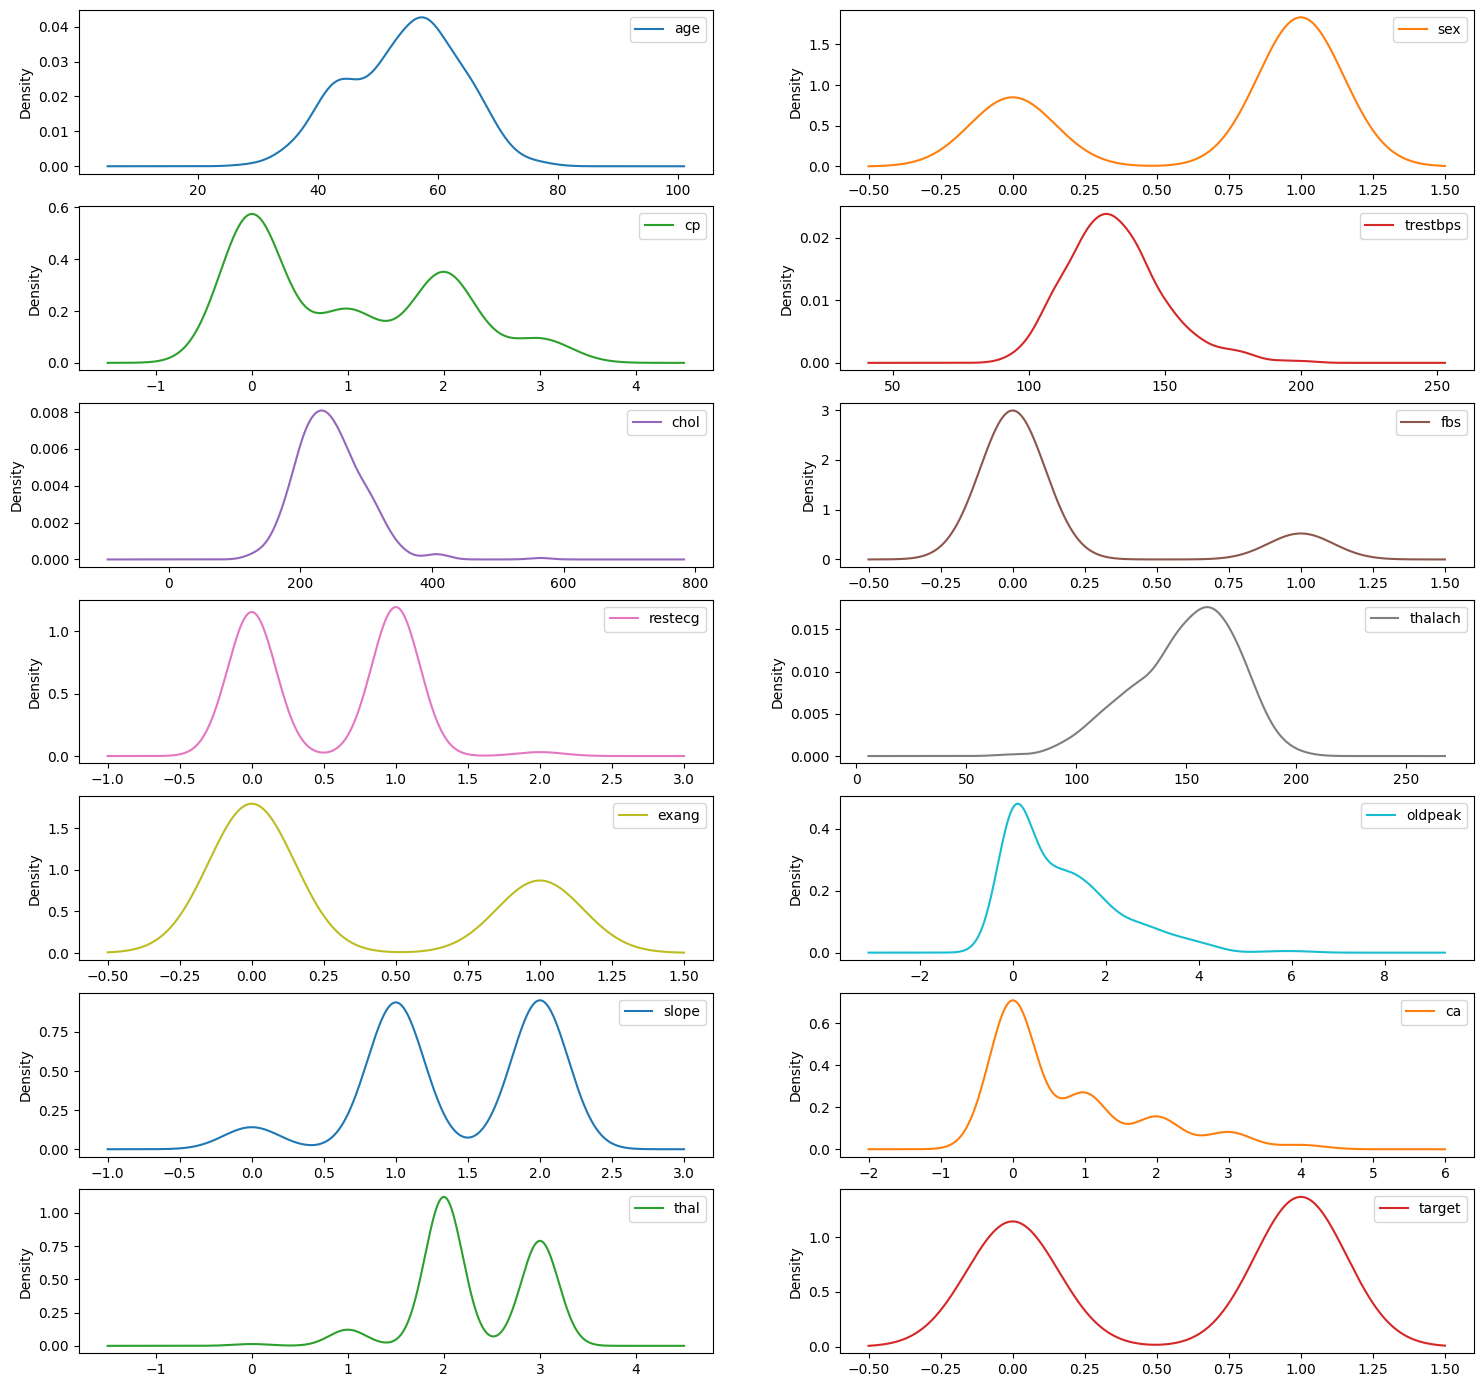

In [13]:
#Density Plot
df.plot(kind='density', subplots=True, layout=(8,2), sharex=False , figsize =(18,20))

In [14]:
#Correlation
correlation = df.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


C:\Users\Sunjeevi\AppData\Local\Temp\ipykernel_9756\3616907330.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x, shade=True, color='g')


<Axes: xlabel='thalach', ylabel='Density'>

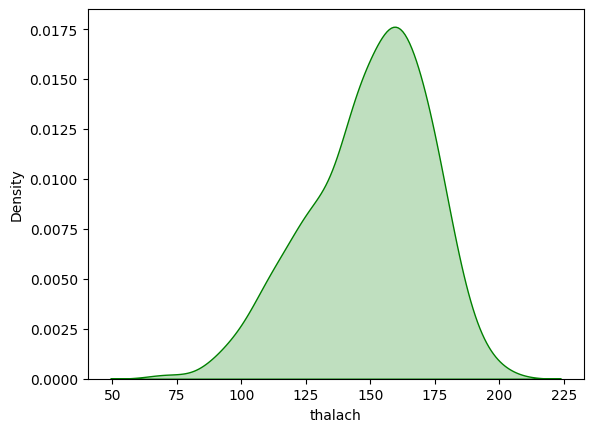

In [15]:
#KDE plot
x = df['thalach']
sns.kdeplot(x, shade=True, color='g')

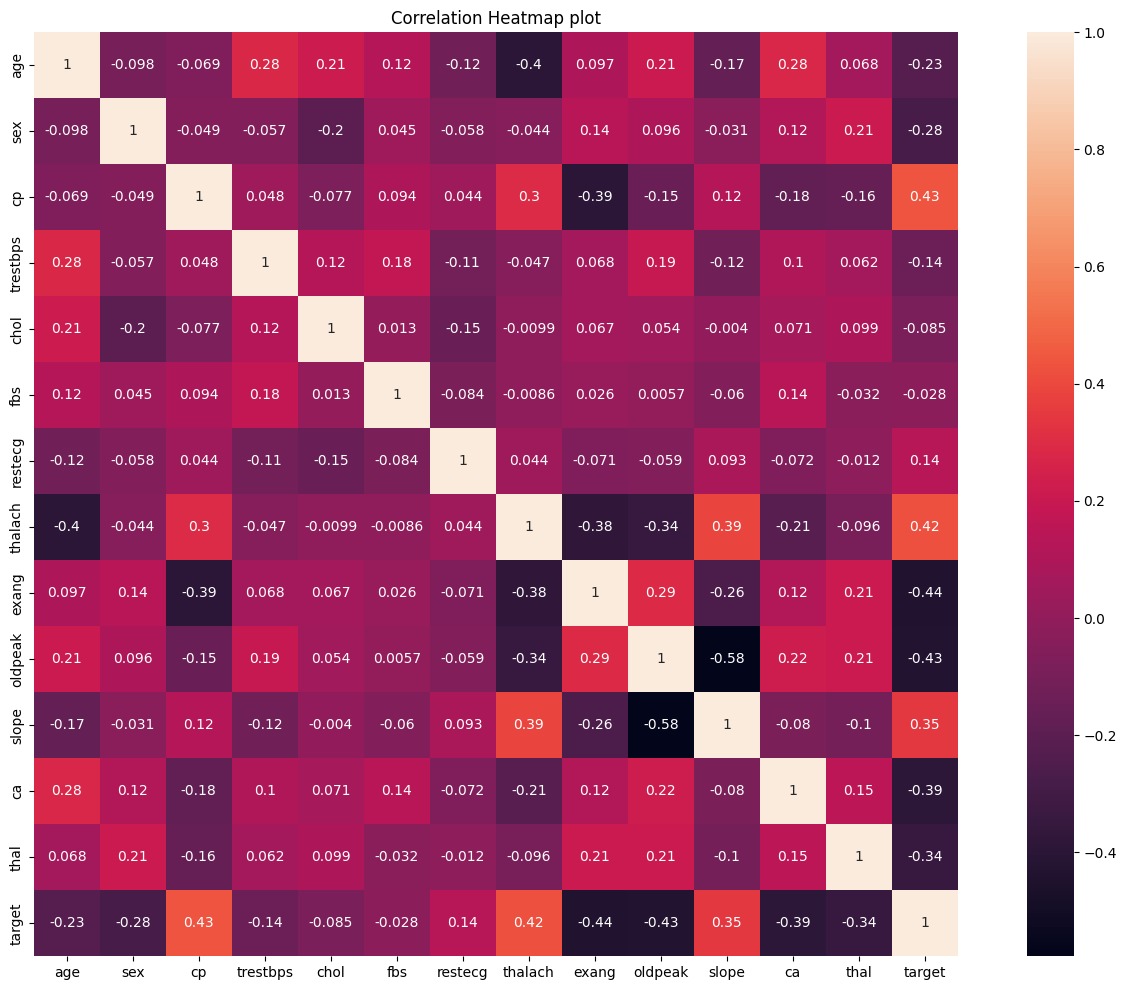

In [16]:
#Heat map
plt.figure(figsize=(18,12))
plt.title('Correlation Heatmap plot')
a = sns.heatmap(correlation, square=True, annot=True)
a.set_xticklabels(a.get_xticklabels())
a.set_yticklabels(a.get_yticklabels())           
plt.show()

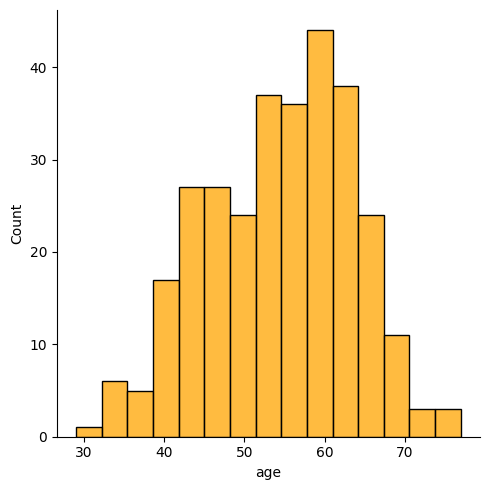

In [17]:
#Distance Plot 
x = df['age']
sns.displot(x, bins=15,color='orange')

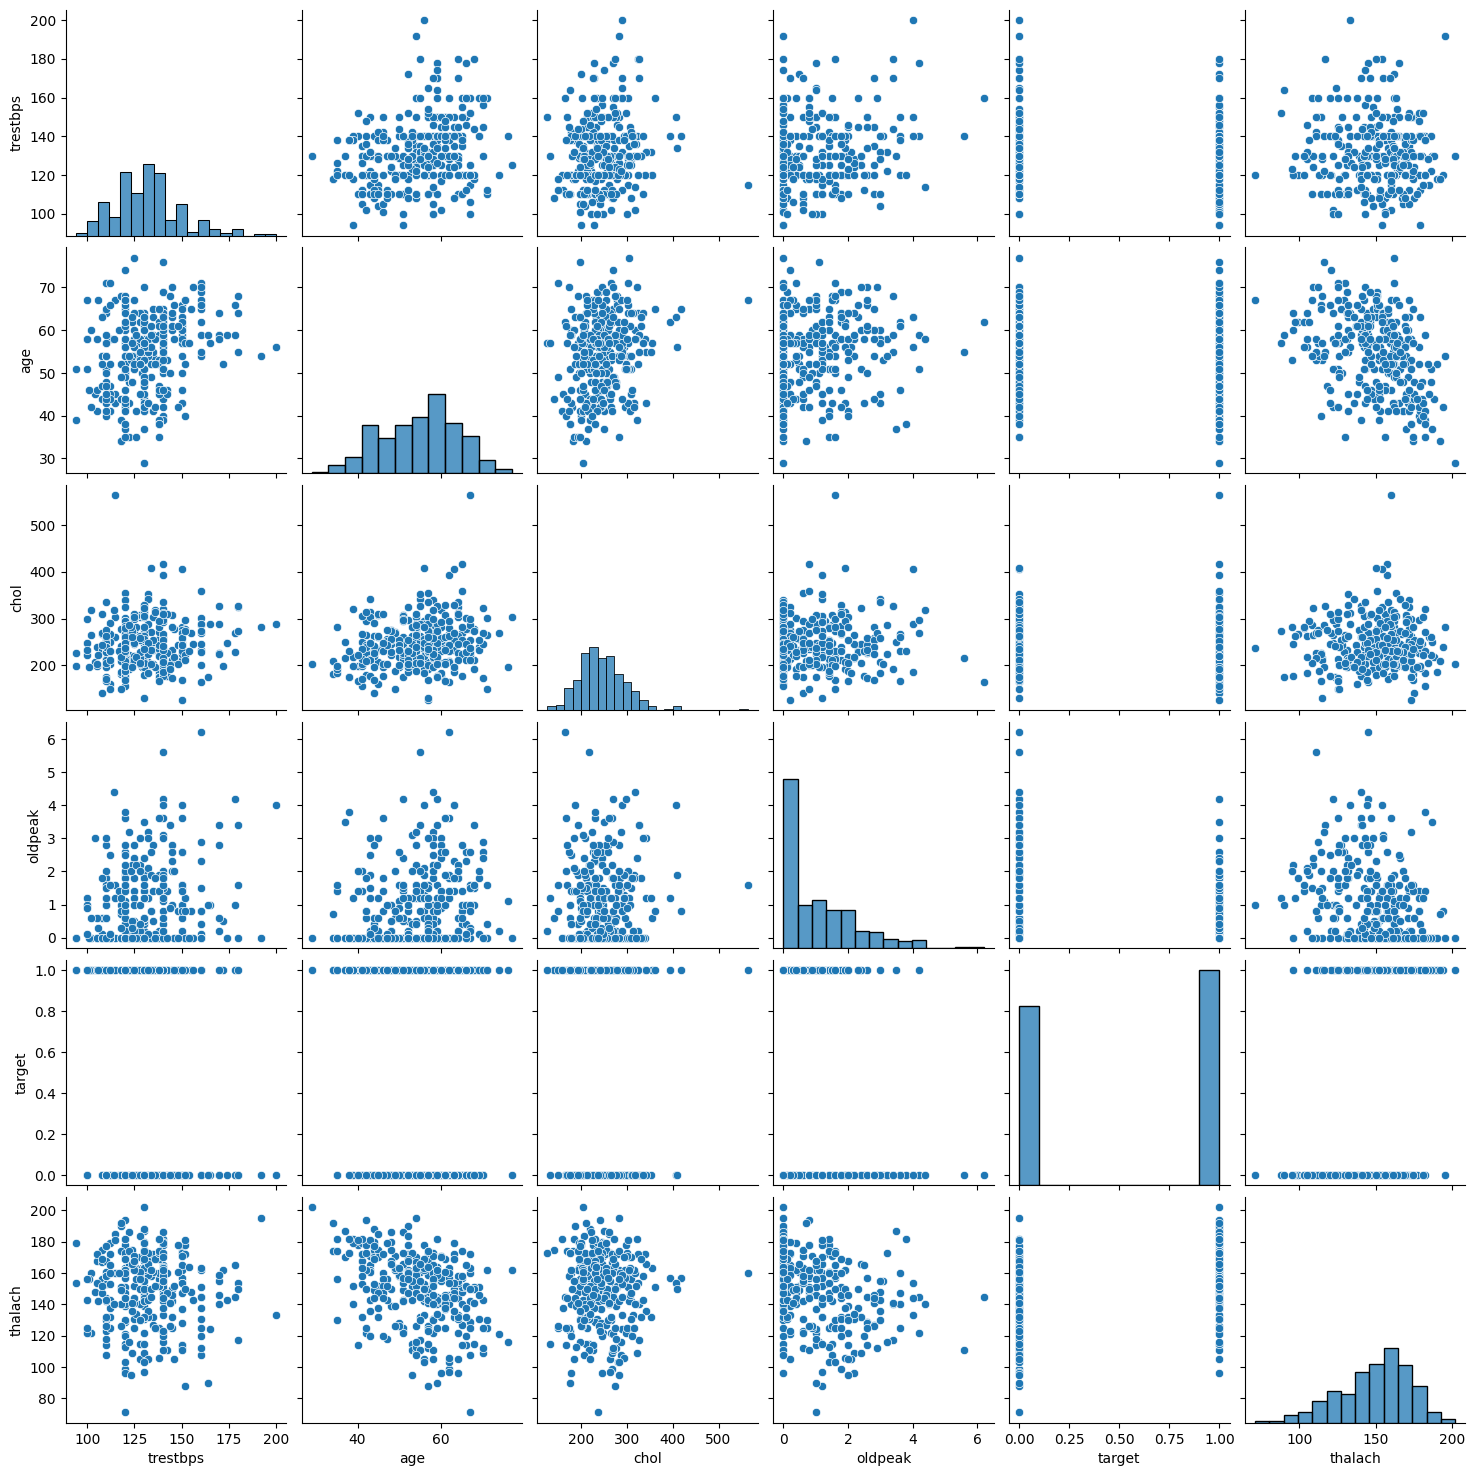

In [18]:
#Pair-Plot
feature = ['trestbps', 'age', 'chol', 'oldpeak', 'target','thalach' ]
sns.pairplot(df[feature], kind='scatter', diag_kind='hist')

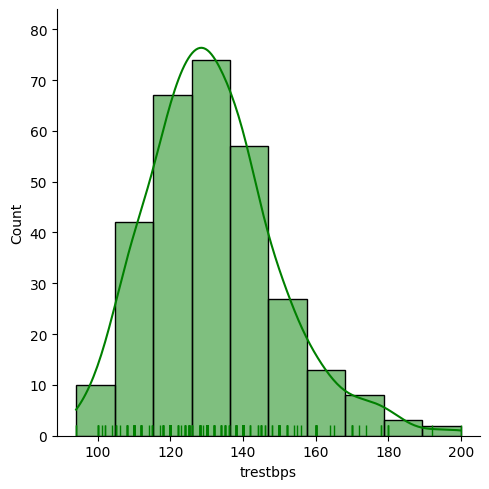

In [19]:
#Distance Plot
sns.displot(df['trestbps'],bins = 10,kde=True,rug=True,color='g')

<Figure size 800x800 with 0 Axes>

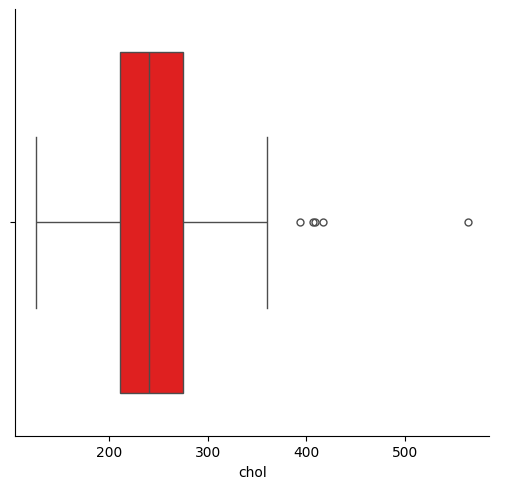

In [20]:
#Category Plot
plt.figure(figsize=(8,8))
sns.catplot(x='chol', kind = 'box', data = df,color='r')

<Axes: xlabel='thalach', ylabel='Density'>

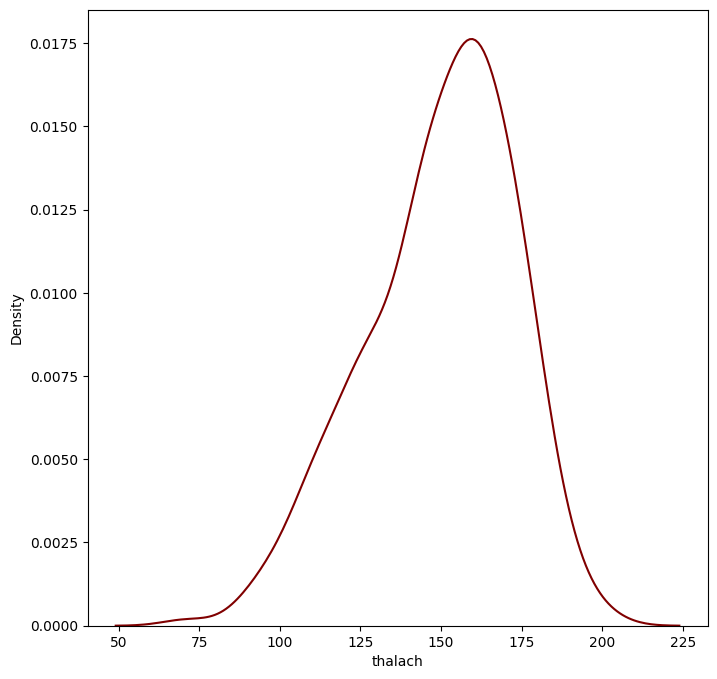

In [21]:
#Kernel Density Estimation 
plt.figure(figsize=(8,8))
sns.kdeplot(data=df['thalach'],color='maroon')

### Feature Engineering and Feature Selection

In [22]:
categorical = []
continous= []

In [23]:
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical.append(column)
    else:
        continous.append(column)

In [24]:
categorical.remove('target')

In [25]:
categorical

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [26]:
continous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [27]:
dataset = pd.get_dummies(df, columns = categorical)

In [28]:
cols = ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang']

In [29]:
X = df[cols]

In [30]:
y = dataset.target

### Modelling

In [31]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [32]:
X.head(10)

,cp,trestbps,chol,fbs,restecg,thalach,exang
0,3,145,233,1,0,150,0
1,2,130,250,0,1,187,0
2,1,130,204,0,0,172,0
3,1,120,236,0,1,178,0
4,0,120,354,0,1,163,1
5,0,140,192,0,1,148,0
6,1,140,294,0,0,153,0
7,1,120,263,0,1,173,0
8,2,172,199,1,1,162,0
9,2,150,168,0,1,174,0


In [33]:
X.columns

Index(['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang'], dtype='object')

In [34]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: target, dtype: int64

<b> 1. Logistic Regression<b>

In [35]:
#Splitting into Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [36]:
#Using this class to make my print statement look bold
class color:
    BOLD = '\033[1m'

In [37]:
accuracies = {}

logreg = make_pipeline(StandardScaler(), LogisticRegression())
logreg.fit(X_train, y_train)

accuracy = accuracy_score(y_test, logreg.predict(X_test))
accuracy_rounded = round(accuracy*100,2)
accuracies['Logistic Regression'] = accuracy_rounded

print(color.BOLD + "Accuracy of Logistic regression is ", accuracy_rounded,'%')

Accuracy of Logistic regression is  81.97 %


<b> 2. K-Nearest Neighbors<b>

In [38]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

accuracy = accuracy_score(y_test, knn.predict(X_test))
accuracy_rounded = round(accuracy*100,2)

accuracies['K-Nearest Neighbors'] = accuracy_rounded

print(color.BOLD + "Accuracy of K-Nearest Neigbors is ", accuracy_rounded,'%')

Accuracy of K-Nearest Neigbors is  62.3 %


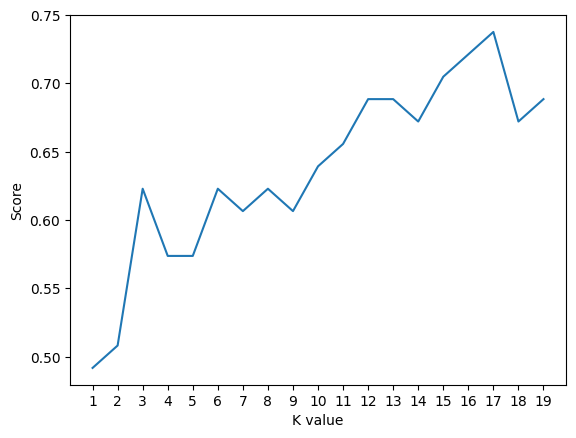

In [39]:
#to find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

As per above diagram, K value is best when we choose <b>6,14,18<b>

<b> 3. Support Vector Machines<b>

In [40]:
svc = SVC()
svc.fit(X_train, y_train)

accuracy = accuracy_score(y_test, svc.predict(X_test))
accuracy_rounded = round(accuracy*100,2)

accuracies['Support Vector Machines(SVC)'] = accuracy_rounded

print(color.BOLD + "Accuracy of Support Vector Machines(SVC) is ", accuracy_rounded,'%')

Accuracy of Support Vector Machines(SVC) is  68.85 %


<b> 4. Naive Bayes<b>

In [41]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

accuracy = accuracy_score(y_test, GNB.predict(X_test))
accuracy_rounded = round(accuracy*100,2)

accuracies['Naive Bayes'] = accuracy_rounded

print(color.BOLD + "Accuracy of Naive Bayes is ", accuracy_rounded,'%')

Accuracy of Naive Bayes is  75.41 %


<b> 5. Decision Tree<u>

In [42]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

accuracy = accuracy_score(y_test, decision_tree.predict(X_test))
accuracy_rounded = round(accuracy*100,2)

accuracies['Decision Tree'] = accuracy_rounded

print(color.BOLD + "Accuracy of Decision Tree is ", accuracy_rounded,'%')

Accuracy of Decision Tree is  65.57 %


<b> 6. Random Forest <b>

In [43]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

model_accuracy = accuracy_score(y_test, classifier.predict(X_test))
accuracy_rounded = round(model_accuracy*100,2)

accuracies['Random Forest'] = accuracy_rounded

print(color.BOLD + "Accuracy of Random Forest is ", accuracy_rounded,'%')

Accuracy of Random Forest is  67.21 %


In [44]:
#Accuracies for all the models
accuracies

{'Logistic Regression': 81.97,
 'K-Nearest Neighbors': 62.3,
 'Support Vector Machines(SVC)': 68.85,
 'Naive Bayes': 75.41,
 'Decision Tree': 65.57,
 'Random Forest': 67.21}

### <b>Comparing Models<b>


C:\Users\Sunjeevi\AppData\Local\Temp\ipykernel_9756\503036086.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


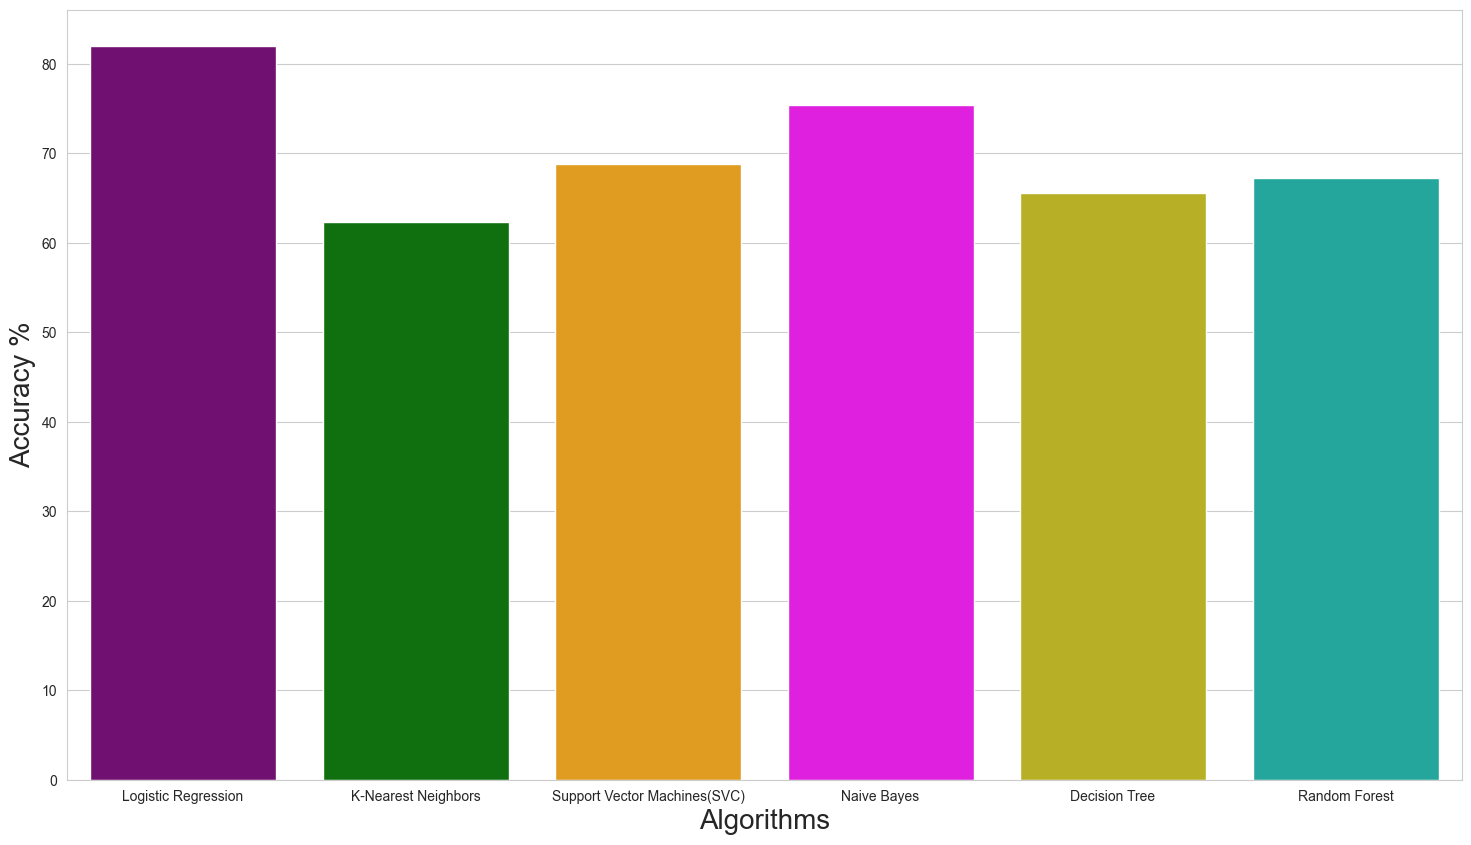

In [45]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(18,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %",fontsize=20)
plt.xlabel("Algorithms",fontsize=20)
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

### Model Evaluation and Accuracy Measurement

In [46]:
# Predicted values for the test dataset
y_head_lr = logreg.predict(X_test)

knn3 = KNeighborsClassifier(n_neighbors = 10)
knn3.fit(X_train, y_train)

y_head_knn = knn3.predict(X_test)

y_head_svm = svc.predict(X_test)

y_head_nb = GNB.predict(X_test)

y_head_dtc = decision_tree.predict(X_test)

y_head_rf = classifier.predict(X_test)

In [47]:
#Measuring Accuracy using confusion matrix for all the algorithms 
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

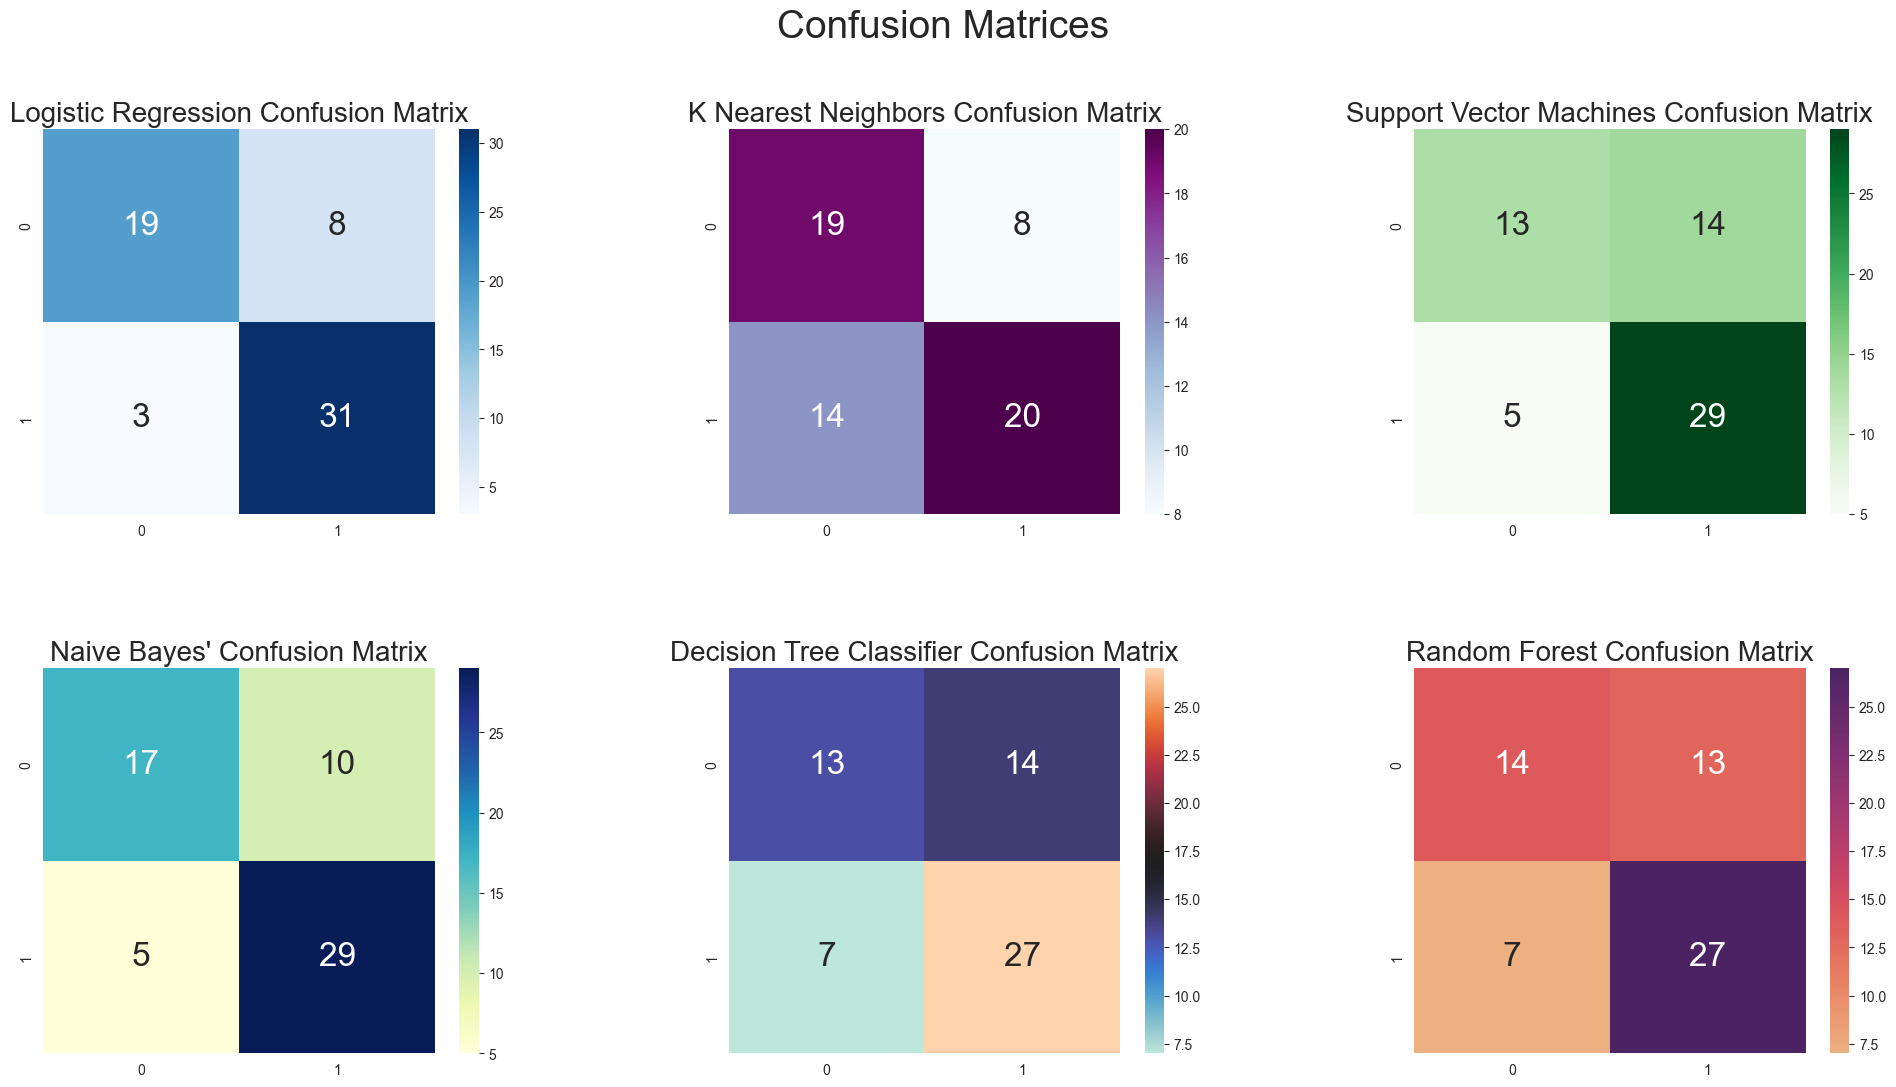

In [48]:
#Plotting confusion matrix for all the algorithms
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=28)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix",fontsize=20)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix",fontsize=20)
sns.heatmap(cm_knn,annot=True,cmap="BuPu",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machines Confusion Matrix",fontsize=20)
sns.heatmap(cm_svm,annot=True,cmap="Greens",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes' Confusion Matrix",fontsize=20)
sns.heatmap(cm_nb,annot=True,cmap="YlGnBu",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=20)
sns.heatmap(cm_dtc,annot=True,cmap="icefire",fmt="d",cbar=True, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix",fontsize=20)
sns.heatmap(cm_rf,annot=True,cmap="flare",fmt="d",cbar=True, annot_kws={"size": 24})

plt.show()

In [49]:
#Exporting model using joblib library
import joblib
joblib.dump(logreg,r"C:\Users\Sunjeevi\PycharmProjects\CCVDPUML\venv\CardiovascularDiseasePrediction\ModelFile\model.pkl")

['model.pkl']